<a href="https://colab.research.google.com/github/wiederm/notebooks/blob/main/circular_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# I generate data on [-pi, pi] which is equivalent to [-180,180].
# generate torsion data (drawn from normal distribution with \mu= pi and \sigma = \pi/4)
torsion_data = np.random.normal(loc=np.pi, scale=np.pi/4, size=200)
torsion_data_wrapped = (torsion_data + np.pi) % (2 * np.pi) - np.pi # that's the data that is similar to yours (values are wrapped)

(array([56., 32., 12.,  1.,  0.,  1.,  1., 11., 35., 51.]),
 array([-3.13479232e+00, -2.50746183e+00, -1.88013134e+00, -1.25280084e+00,
        -6.25470349e-01,  1.86014402e-03,  6.29190637e-01,  1.25652113e+00,
         1.88385162e+00,  2.51118212e+00,  3.13851261e+00]),
 <BarContainer object of 10 artists>)

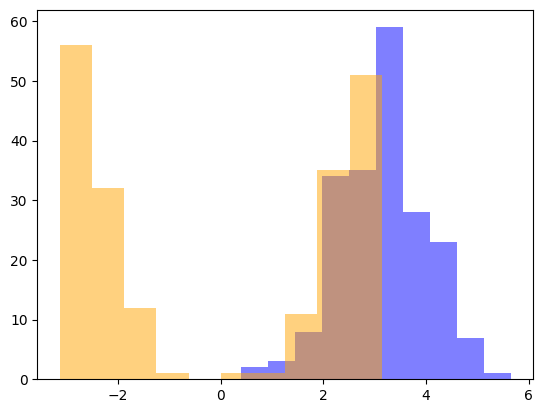

In [ ]:
# blue is not wrapped and goes beyond the [-pi, pi] interval
# orange is wrapped

#sns.kdeplot(torsion_data, color='blue')
plt.hist(torsion_data, color='blue', alpha=0.5)
#sns.kdeplot(torsion_data_wrapped, color='orange')
plt.hist(torsion_data_wrapped, color='orange', alpha=0.5)

In [ ]:
# calculate circular mean, https://en.wikipedia.org/wiki/Circular_mean
mean_angle = np.arctan2(np.sum(np.sin(torsion_data_wrapped)), np.sum(np.cos(torsion_data_wrapped)))
print(f'Circular mean: {mean_angle}')
# let's calculate circular standard deviation https://www.ebi.ac.uk/thornton-srv/software/PROCHECK/nmr_manual/man_cv.html
R = (1/len(torsion_data_wrapped)) * np.sqrt(np.sum(np.cos(torsion_data_wrapped))**2+ np.sum(np.cos(torsion_data_wrapped)**2))
sigma = np.sqrt(-2 * np.log(R))
print(f'Curcular stddev: {sigma}')

Circular mean: -3.137408239476297
Curcular stddev: 0.8279973169095644


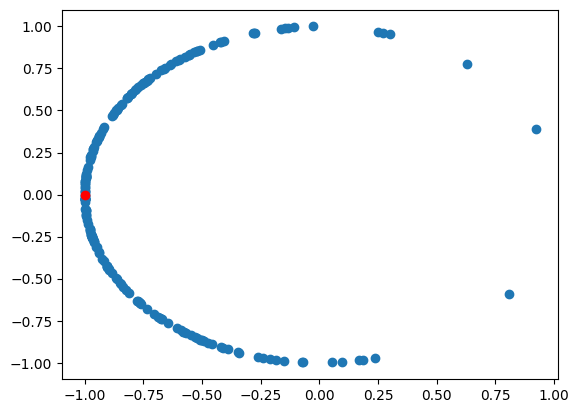

In [ ]:
plt.scatter(np.cos(torsion_data_wrapped), np.sin(torsion_data_wrapped))
plt.scatter(np.cos(mean_angle), np.sin(mean_angle), color='red')